In [200]:
import numpy as np
import pylab
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.pyplot as plt
from scipy import optimize

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

(20, 40)


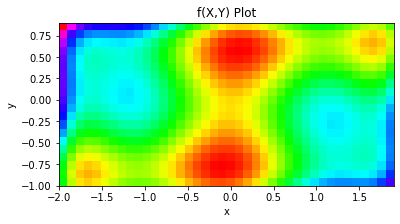

Point =  [0, 0]
Solution: f([ 0.08984201 -0.7126564 ]) = -1.0316284535
Point =  [-0.1, 0.5]
Solution: f([-0.08984201  0.7126564 ]) = -1.0316284535
Point =  [0.1, -0.5]
Solution: f([ 0.08984201 -0.71265641]) = -1.0316284535


Comment for task 1: Globam minimum points: (0.08984201, -0.7126564) and (-0.08984202, 0.7126564).
Comment for task 2: 2 global minima points have found.
Comment for task 3: Gives the result with as (-0.08984202, 0.7126564)


In [203]:
import numpy as np
import pylab
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.pyplot as plt
from scipy import optimize

#Defining function
def f(X_Y):
    x,y=X_Y
    return (4-2.1*(x**2) + x**4/3)*(x**2) + (x*y) + ((4*(y**2)-4))*(y**2)  
#Defining variable regionshttp://localhost:8888/notebooks/Lab8/08ex_fitting.ipynb#
x = np.arange(-2,2,0.1)
y = np.arange(-1,1,0.1)


#Creating a rectangular grid out of 2 given 1-dimensional arrays that denotes the Matrix or Cartesian indexing.
x_mesh, y_mesh = np.meshgrid(x,y)


f_x_y = f([x_mesh,y_mesh])

#finding limit values
limit_values= np.min(x), np.max(x), np.min(y), np.max(y)


pylab.figure()
pylab.imshow(f_x_y, cmap ='hsv', extent=limit_values)

print(f_x_y.shape)
plt.title("f(X,Y) Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#The points that will be analyzed according to given interval
points = [[0,0],[-0.1,0.5],[0.1,-0.5]]

#scipy.optimize.basinhopping function helps to find global minimum functions
result = [optimize.basinhopping(f, point_ind, stepsize=0.5, niter=500) for point_ind in starting_points]

#zip function pairs the points
for i,point_ind in zip(result, points):
    print("Point = ",point_ind)
    index = i['x'] #indexing
    calculation = f(index) #calling function
    print('Solution: f(%s) = %.10f' % (index,calculation ))
    
print("\n")    
print("Comment for task 1: Globam minimum points: (0.08984201, -0.7126564) and (-0.08984202, 0.7126564).")
print("Comment for task 2: 2 global minima points have found.")
print("Comment for task 3: Gives the result with as (-0.08984202, 0.7126564)")

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Comment: Absolutely reasonable because all data were shown as perfectly.
Yes, time offset for min and max temperatures the same within the fit accuracy.


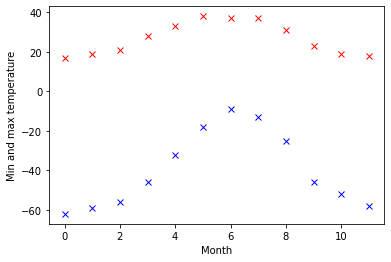

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline


max_temperatures = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temperatures = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

#1-Plotting these temperatures.

#Defininng months by creating arrray between 0-12
months = np.arange(12)

#Red color was used for maximum temperatues and blue color was used for minimum temperatures
plt.plot(months, max_temperatures , 'rx')
plt.plot(months, min_temperatures, 'bx')

#Labeling axes
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

#2-Find a suitable a function that can describe min and max temperatures.

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temperatures, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temperatures, [-40, 20, 0])


print("Comment: Absolutely reasonable because all data were shown as perfectly.")
print("Yes, time offset for min and max temperatures the same within the fit accuracy.")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

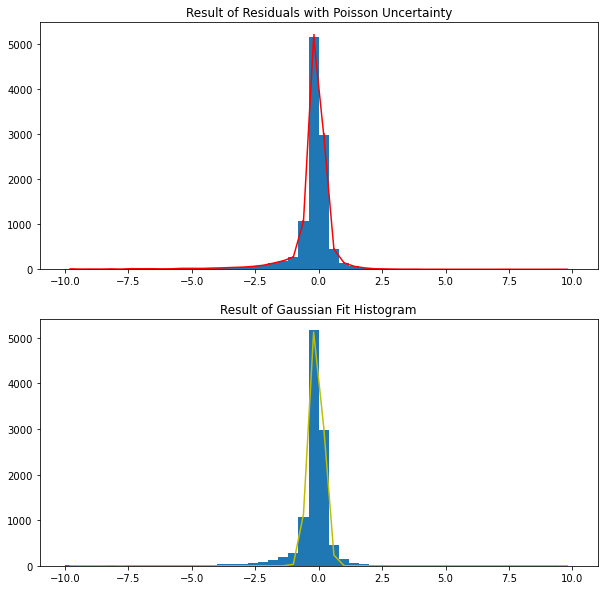

Vvalue of p:  0.0
Comment: Since p value is very small, it resuls that fit is not satisfactory.


In [205]:
import pandas as pd
#The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
import pickle
from scipy.optimize import curve_fit
import math
import numpy as np
from scipy import stats

#Defining gaussian function to analyze histograms
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

with open('/Users/h-a-k/Lab8/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data.item(0))
residual = df['residuals'].to_numpy()

#Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
fig,(histogram1,histogram2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
hist,bins,_ = histogram1.hist(df['residuals'], bins = 50, range = (-10,10))
bin_centers = (bins[:-1] + bins[1:])/2.

#Set the appropriate Poisson uncertainty for each bin (thus, for each bin,  𝜎𝑖=√𝑛𝑖 , where  𝑛𝑖  is the number of entries in each bin)
sig_y = np.sqrt(np.abs(h))
histogram1.errorbar(x = bin_centers, y = hist, yerr=sig_y, color="r")
histogram1.set_title("Result of Residuals with Poisson Uncertainty")

#By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
parameter_values, covariance_values = curve_fit(gaussian, bin_centers, hist)
gaussian_fit = gaussian(bin_centers, *parameter_values)

histogram2.plot(bin_centers, gaussian(bin_centers, *parameter_values), 'y-', label='Gaussian Fit')
histogram2.hist(df['residuals'], bins = 50, range = (-10,10))
histogram2.set_title("Result of Gaussian Fit Histogram")
plt.show()


#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?
statistic_value,p = stats.chisquare(hist, gaussian_fit)
print("Vvalue of p: ",p)
print("Comment: Since p value is very small, it resuls that fit is not satisfactory.")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

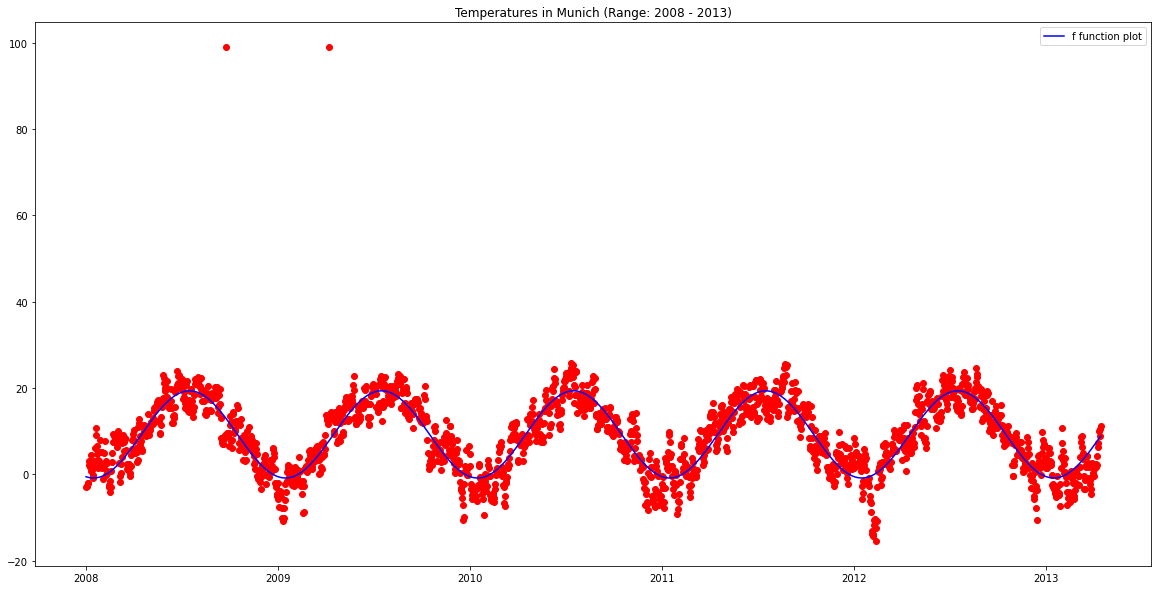

Overall average temperature in Munich:  8.878905848575862
Coldest value predicted in Munich:  19.354843554196208
Hottest value predicted in Munich:  -0.8319838904804033
b parameter means that it must be needed to move the function into requested direction.


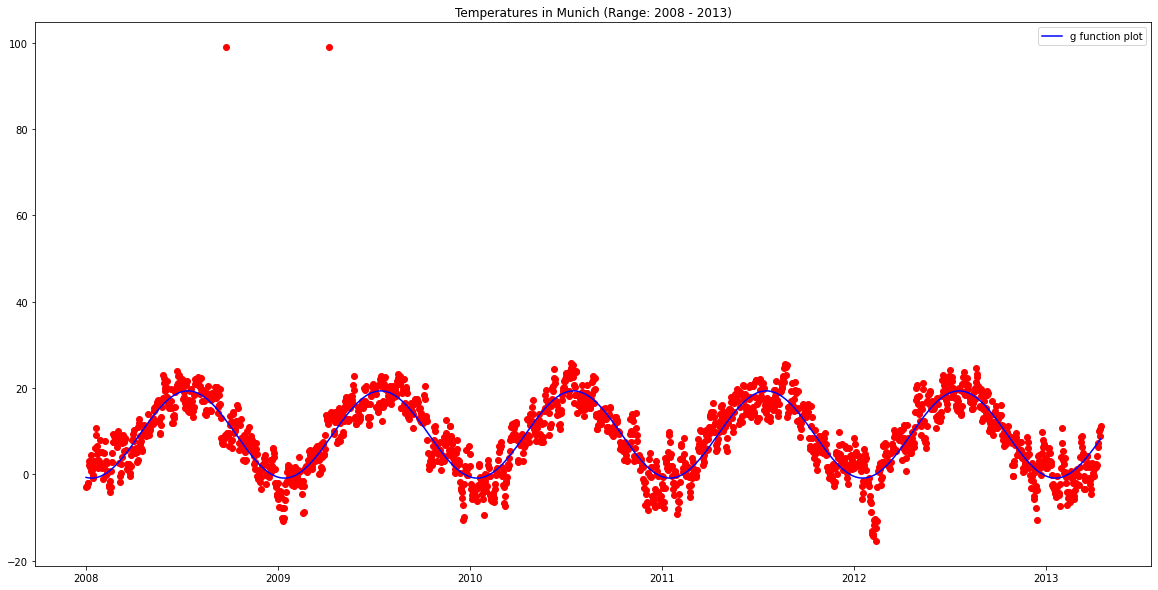

Result of RSS of function f:  42527.75965167017
Result of RSS of function g:  42410.172541437314
CL: 0.609 , Is it additional parameter necessary?:  Not Affirmative


0.6089863749077196

In [206]:
def f_func(t,a,b,c):
    return a*np.cos(2*math.pi*t + b) + c

with open('/Users/h-a-k/Lab8/munich_temperatures_average_with_bad_data.txt', 'r') as f:
    df = pd.read_csv(f, sep=" ", header=None)
    df.columns = ["date", "temperature"]
    

#Make a plot of the data and the best-fit model in the range 2008 to 2012.
range_of_data = df[(df['date']>=2008)&(df['temperature']<=2012)]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(range_of_data['date'],range_of_data['temperature'], 'ro')
ax.set_title("Temperatures in Munich (Range: 2008 - 2013)")

parameters,_ = curve_fit(f_func, range_of_data['date'], range_of_data['temperature'])
f_function_fit = f_func(range_of_data['date'],parameters[0],parameters[1],parameters[2])
ax.plot(range_of_data['date'],f_function_fit,'b-', label="f function plot")
ax.legend()
plt.show()


#What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?
print("Overall average temperature in Munich: ",range_of_data['temperature'].mean())
print("Coldest value predicted in Munich: ",max(f_function_fit))
print("Hottest value predicted in Munich: ",min(f_function_fit))

#What is the meaning of the  𝑏  parameter, and what physical sense does it have?
print("b parameter means that it must be needed to move the function into requested direction.")



#Now fit the data with the function  𝑔(𝑥) , which has 1 more parameter than  𝑓(𝑥) .
def g_func(t,a,b,c,d):
    return a*np.cos(2*math.pi*b*t + c) + d

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(range_of_data['date'],range_of_data['temperature'], 'ro')
ax.set_title("Temperatures in Munich (Range: 2008 - 2013)")

parameters,_ = curve_fit(g_func, range_of_data['date'], range_of_data['temperature'])
g_function_fit = g_func(range_of_data['date'],parameters[0],parameters[1],parameters[2],parameters[3])
ax.plot(range_of_data['date'],g_function_fit,'b-', label="g function plot")
ax.legend()
plt.show()

#What are the RSS for  𝑓(𝑥)  and  𝑔(𝑥) ?
RSS_1 = sum(np.square(range_of_data['temperature']-f_function_fit))
RSS_2 = sum(np.square(range_of_data['temperature']-g_function_fit))

print('Result of RSS of function f: ', RSS_1)
print('Result of RSS of function g: ', RSS_2)

#Use the Fisher F-test to determine whether the additional parameter is motivated.
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F_test = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F_test, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", Is it additional parameter necessary?: ", "Affirmative" if CL < 0.10 else "Not Affirmative")
    return CL

Ftest(RSS_1,RSS_2,4,5,100, verbose=True)